# Solving TSP with Genetic Algorithm (GA)

Understanding the principles of genes and mutation as the driving mechanism
for evolution is common today. Less common is the availability of a minimal
viable [example](example.py), that showcases the method.  
So here's an example I've used to enlighten friends, where I deliberately
deviate from pep-8 to introduce imports only when they're needed.

To solve the Traveling Salesmans Problem (TSP), we need cities to travel to, 
and to keep the world simple, we have only `x` and `y` to worry about, and
use a straight line distance:

In [3]:
from collections import namedtuple

City = namedtuple("City", ["x", "y", "id"])

def distance(a, b):
    return ((a.x - b.x) ** 2 + (a.y - b.y) ** 2) ** (1 / 2)

With this out of the way, the next element is a map: 

1. We want to keep the cities in a dictionary, for easy of lookup.
2. We want the cities to be on the map, so we set a max `x` and a max `y` value.
2. We want to be able to generate the cities somewhat random.

In [2]:
import random
random.seed(43)  # set the seed for repeatability.

def make_map(n_cities, x_max=1200, y_max=600):
    cities = {}
    for city in range(n_cities):
        x, y = random.randint(0, x_max), random.randint(0, y_max)
        c = City(x, y, id=f"{x},{y}")
        cities[c.id] = c
    return cities

We can now make with any number of cities in a single line:


In [4]:
city_map = make_map(n_cities=5)

Making a random route visiting all cities, should also be easy, as we can choose
any random sequence that contains all towns:


In [5]:
def make_random_route(city_map):
    """ creates a random route. """
    cities = list(city_map)
    random.shuffle(cities)
    return cities 

To determine which of two routes is the shorter, it is nice to have a function 
that does the work for us. Just remember one thing:  
The TSP returns to start after traveling through all cities, so the distance
must include the consideration that it returns to start after all cities have
been visited.

In [6]:
def route_length(citymap, route):
    dist = 0.0
    a = route[0]
    for b in route[1:] + route[:1]:
        city_a, city_b = citymap[a], citymap[b]
        dist += distance(city_a, city_b)
        a = b
    return int(dist)

Let's make a helper to look at it:


In [7]:
from matplotlib import pyplot as plt
from itertools import count
map_no = count() 

def plot(citymap, route):
    plt.figure()
    xs = [c.x for c in citymap.values()]
    ys = [c.y for c in citymap.values()]

    plt.plot(xs, ys, 'o')

    a = route[0]
    for b in route[1:] + route[:1]:
        city_a, city_b = citymap[a], citymap[b]
        plt.plot([city_a.x, city_b.x], [city_a.y, city_b.y], 'bo-', clip_on=False)
        a = b

    plt.title("({}) length: {:,}".format(next(map_no), route_length(citymap, route)))
    plt.show()


Then plot it:


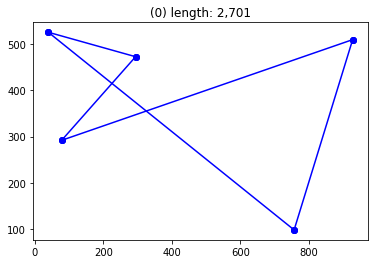

In [8]:
first_route = make_random_route(city_map)
plot(city_map, first_route)

From this point we can **_mutate_** our `first_route` simply by changing the order
in which we visit the different cities. It would work this way:

If we have 9 cities as a list like this:

    [1,2,3,4,5,6,7,8,9]
   
We can select a random index point in the list and swap the numbers in the position 
before and after the index point 

    [1,2,3,4,5,6,7,8,9]
             ^--- here.

The position with the one after:

before \[1,2,3,4,_**5,6**_,7,8,9]
after  \[1,2,3,4,_**6,5**_,7,8,9]

We can express this change as a very simple function:

In [9]:
def mutate(route):
    new_route = route[:]   # copy the route
    cut = random.randint(1, len(route)-2)  # select the index point.
    new_route[cut], new_route[cut+1] = route[cut+1], route[cut]  # swap the values.
    return new_route

The one thing that remains to be discussed is the relationship between fitness
and evolution. We want the "fittest" to be the shortest path.  

Lets' try it out and check if the new route is better. Spoiler alert: It won't be.

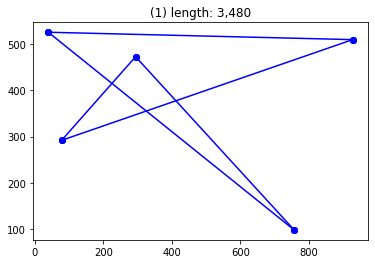

In [10]:
new_route = mutate(first_route)
plot(city_map, new_route)

In [11]:
before = route_length(city_map, first_route)
after = route_length(city_map, new_route)
print("distance before:", before, ", distance after:", after)

distance before: 2701 , distance after: 3480


As you observe, the mutation is not better than the first randomly created 
route. This leads us to acknowledge that randomised evolution is quite wasteful, 
despite that it can find a good solution. To overcome this we require retention
of the _fittest_ solution:

shortest distance after 30 : 2285


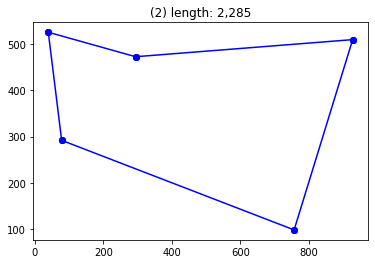

In [12]:
generations = 30                               # number of generations to explore
shortest_distance = float('inf')

for _ in range(generations):
    new_route = mutate(first_route)            # make mutation
    dist = route_length(city_map, new_route)   # measure fitness.
    if dist < shortest_distance:               # retain fittest solution.
        first_route = new_route
        shortest_distance = dist

print("shortest distance after", generations, ":", shortest_distance)
plot(city_map, first_route)

The for loop will now generate solutions, test their fitness and retain the better.  
Each iteration will look like this:

![ga_tsp](artwork/ga_tsp.gif) 


And the winner is:

![3](artwork/myplot3.png)